In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt

### Step 1: download the data

In [16]:
dataframe_all = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")
num_rows = dataframe_all.shape[0]

print('No. of rows:', num_rows)

No. of rows: 19622


C:\Users\Tejas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
dataframe_all.head()

,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,-20,5,23,-2,600,-305,-128.0,22.5,-161.0,34,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,-22,3,21,-6,604,-310,-128.0,22.1,-161.0,34,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,-21,2,24,-6,600,-302,-128.0,22.1,-161.0,34,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


Each row represents a different person and each column is on of many physical measurments lke the position of their arm, or forearm and each person gets one of 5 labels (classes) like sitting, standing, jumping, running and jogging.

In [43]:
#List all fators from our response variable
dataframe_all.classe.unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

### Step 2: remove useless data

In [44]:
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]

print('Columns without Nan:', counter_without_nan )
# remove the columns with missing elements
dataframe_all = dataframe_all[counter_without_nan.keys()]

# remove the first 7 columns which contain no discriminative information
dataframe_all = dataframe_all.iloc[:,7:]

# the list of columns (the last column is the class label)
columns = dataframe_all.columns
print (columns)

Columns without Nan: accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbell_y        0
accel_dumbbell_z        0
magnet_dumbbell_x       0
magnet_dumbbell_y       0
magnet_dumbbell_z       0
roll_forearm            0
pitch_forearm           0
yaw_forearm             0
total_accel_forearm     0
gyros_forearm_x         0
gyros_forearm_y  

### Step 3: get features (x) and scale the features


In [45]:
# get x and convert it to numpy array
x = dataframe_all.iloc[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

### Step 4: get class labels y and then encode it into number 

In [46]:
# get class label data
y = dataframe_all.iloc[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Step 5: split the data into training set and test set

In [47]:
test_percentage = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

### t-distributed Stochastic Neighbor Embedding (t-SNE) visualization

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

### Scatter plot the sample points among 5 classes

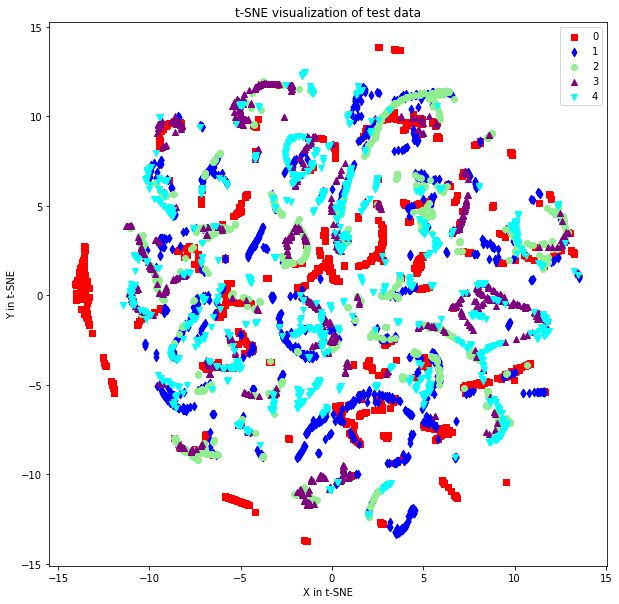

In [52]:
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}

plt.figure()
plt.figure(figsize=(10,10))
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper right')
plt.title('t-SNE visualization of test data')
plt.show()
